<a href="https://colab.research.google.com/github/Athira-M-Chandran/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
X.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
dtype: int64

In [9]:
print(X['Geography'].unique())
print(X['Gender'].unique())
print(X['NumOfProducts'].unique())
print(X['HasCrCard'].unique())
print(X['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [10]:
# one hot encoding
geography = pd.get_dummies(X['Geography'],drop_first= True)
gender = pd.get_dummies(X['Gender'],drop_first = True)
# drop_first will drop the first column ; here France and Female

In [11]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [12]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [13]:
# Concatenate this variables with dataframe
X= X.drop(['Geography','Gender'], axis = 1)


In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.concat([X,geography,gender],axis  = 1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
#splitting the dataset into tarin and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [18]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# y fit_transform for x_train and transform for x_test?  Avoid data leakage

In [19]:
X_train.shape

(8000, 11)

In [20]:
X_test.shape

(2000, 11)

In [21]:
y_test.shape

(2000,)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
import tensorflow as tf

In [24]:
# Part 2 - create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout
# Dense 

In [25]:
#Lets initialize ANN
classifier = Sequential()

In [26]:
# Adding input layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))

In [27]:
classifier

In [28]:
# Adding second hidden layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.2))

In [29]:
# Adding third hidden layer
classifier.add(Dense(units=10,activation='relu'))
classifier.add(Dropout(0.3))

In [30]:
# Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [31]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable pa

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [33]:
classifier.compile(optimizer=opt, loss= 'binary_crossentropy',metrics = ['accuracy'])
# compile the model means making it perfectly fit by giving required parameters 
# parameters used for forward and backward propagation
# you can use this also
#classifier.compile(optimizer='adam', loss= 'binary_crossentropy',metrics = ['accuracy'])

In [34]:
# Early stopping- at certain point even if the number of epochs is not reached bt the decreasing in the loss range in small interval we can stop the iteration

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)
# monitor = 'val_loss' ; monitor validation loss
# patience = 20   ; this callback will stop the training when there is no improvement in the loss for 20 epochs



In [35]:
#model_history =  classifier.fit(X_train,y_train,validation_data =(X_test,y_test),batch_size = 10,epochs = 100,callbacks = early_stopping)
model_history =  classifier.fit(X_train,y_train,validation_split =0.33,batch_size = 10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 5s 4ms/step - loss: 0.4662 - accuracy: 0.8048 - val_loss: 0.4205 - val_accuracy: 0.8217
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4249 - accuracy: 0.8194 - val_loss: 0.3901 - val_accuracy: 0.8326
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3882 - accuracy: 0.8408 - val_loss: 0.3807 - val_accuracy: 0.8440
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3747 - accuracy: 0.8408 - val_loss: 0.3602 - val_accuracy: 0.8523
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3761 - accuracy: 0.8462 - val_loss: 0.3681 - val_accuracy: 0.8470
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3726 - accuracy: 0.8485 - val_loss: 0.3831 - val_accuracy: 0.8421
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3743 - accuracy: 0.8515 - val_loss: 0.3660 - val_accuracy: 0.8516

In [36]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

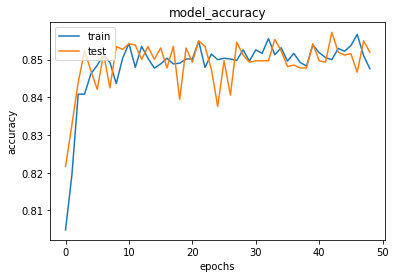

In [37]:
# summary accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

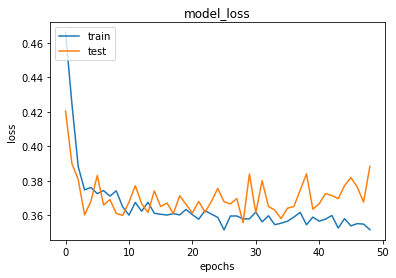

In [38]:
# summary loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [39]:
# Predicting the test 
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 228,  177]])

In [42]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)

In [43]:
score

0.8565

In [44]:
classifier.get_weights()

[array([[-6.3937336e-02, -6.1213058e-01, -3.8961047e-01, -2.7987531e-01,
         -8.2850724e-01,  7.3777422e-02, -8.5515743e-01,  6.0706311e-01,
          1.2419554e+00,  1.5195467e-01],
        [-8.6037445e-01,  1.0095217e+00, -1.2294115e-01,  8.5762948e-01,
          1.0145586e+00, -2.6543610e+00, -2.6337454e+00,  1.8631583e-01,
         -1.6253008e+00,  2.3957682e+00],
        [-1.2643458e+00,  6.9136631e-01,  7.0122349e-01,  3.2046783e-01,
          5.5325150e-01,  5.8487964e-01,  3.0402377e-01,  1.3118017e+00,
          1.1975889e+00,  1.3912005e-03],
        [-7.4065959e-01, -5.9357905e-01, -3.7109883e+00,  1.0270983e+00,
         -4.9525321e-01,  1.3602325e-01, -5.9529418e-01, -7.1773499e-01,
         -9.9955410e-01, -7.5073522e-01],
        [-3.1516794e-02, -4.8554978e+00, -2.0183051e+00,  3.9282734e+00,
         -6.7453307e-01, -1.4424720e+00,  2.1116742e-01,  1.6979952e-01,
         -9.0503585e-01, -6.8642926e-01],
        [ 4.8501834e-01, -1.1094784e-01,  1.9786055e-01, -3.

In [45]:
# save h5 file
classifier.save('model.h5')

In [46]:
# load model file(h5  file)
from tensorflow import keras
classifier1 = keras.models.load_model('model.h5')

In [47]:
classifier1

In [48]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.38853818],
       [0.29165825],
       [0.23288384],
       ...,
       [0.20550188],
       [0.22648545],
       [0.23221812]], dtype=float32)

> **REGRESSION**

In [49]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [51]:
X = dataset[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y = dataset.iloc[:,12]

In [52]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42,2,0.00,1,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,1
3,699,France,Female,39,1,0.00,2,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,0


In [53]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [54]:
# one hot encoding
geography = pd.get_dummies(X['Geography'],drop_first= True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

# Concatenate this variables with dataframe
X= X.drop(['Geography','Gender'], axis = 1)

X = pd.concat([X,geography,gender],axis  = 1)

#splitting the dataset into tarin and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [55]:


#feature scaling
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# y fit_transform for x_train and transform for x_test?  Avoid data leakage

#Lets initialize ANN
regressor = Sequential()

# Adding input layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))

# Adding second hidden layer
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.2))
# Adding third hidden layer
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dropout(0.3))

# Adding output layer
regressor.add(Dense(1))

regressor.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable 

In [56]:
mse = tf.keras.losses.MeanSquaredError(
    name = 'mean_squared_error'
)
metrics = tf.keras.metrics.MeanSquaredError(
    name = 'mean_squared_error',dtype = None
)

In [57]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
regressor.compile(optimizer=opt, loss= mse,metrics = ['mae'])

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'mae',
    patience = 20
)

In [59]:
#model_history =  regressor.fit(X_train,y_train,validation_data =(X_test,y_test),batch_size = 10,epochs = 100,callbacks = early_stopping)
model_history =  regressor.fit(X_train,y_train,validation_split =0.33,batch_size = 10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 6706523136.0000 - mae: 67015.0859 - val_loss: 3479011072.0000 - val_mae: 50640.2344
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 4108806400.0000 - mae: 53891.5703 - val_loss: 3474900736.0000 - val_mae: 50535.8438
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 4083860480.0000 - mae: 53592.4180 - val_loss: 3395129600.0000 - val_mae: 50111.3242
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 4120701440.0000 - mae: 53865.8828 - val_loss: 3475891968.0000 - val_mae: 50479.5547
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 4084250624.0000 - mae: 53536.2852 - val_loss: 3452449792.0000 - val_mae: 50395.2734
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 4007464960.0000 - mae: 53309.3242 - val_loss: 3427344384.0000 - val_mae: 50282.0234
Epoch 7/100
536/536 [=========================

In [60]:

# Predicting the test 
y_pred = regressor.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [61]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
1037    180969.55
2899     70760.69
9549    141533.19
2740     11276.48
6690    192950.60
Name: EstimatedSalary, Length: 2000, dtype: float64

In [62]:
y_pred

array([[107368.06],
       [106566.74],
       [ 99567.77],
       ...,
       [ 87734.44],
       [ 92232.58],
       [105514.94]], dtype=float32)

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test,y_pred)

-0.010427913855767246